In [1]:
%cd yolor

C:\Users\user\Desktop\jh\yolor


In [14]:
from glob import glob

all_train_label_list = glob("../dataset/train-001/labels/*.txt")

train002_label_list = glob("../dataset/train-suv/labels/*.txt")

In [15]:
len(all_train_label_list), len(train002_label_list)

(24650, 0)

# Extract Target Class

In [16]:
from tqdm import tqdm

num_class = 0
class_list = []
target_classes = [12, 10, 8, 3, 4, 6, 9, 11, 5, 2, 13, 7, 1]

for train_labels in tqdm(all_train_label_list): # 1 txt file
    with open(train_labels, 'r', encoding='utf-8') as f:
        label = f.readlines() # 1 txt file labels
        for lab in label: # 1 line, in 1 txt file
            lab = lab.split(' ')
            cls, x, y, w, h = int(lab[0]), float(lab[1]), float(lab[2]), float(lab[3]), float(lab[4])
    
            if cls in target_classes:
                num_class += 1
                
                target_cls = {}
                target_cls['cls'] = cls
                target_cls['x'], target_cls['y'], target_cls['w'], target_cls['h'] = x, y, w, h
                #class['bbox'] = yolobbox2bbox(x, y, w, h, 1920, 1080)
                target_cls['id'] = num_class
                target_cls['txt_path'] = train_labels
                #print("class:", cls, x, y, w, h, "\tbbox:", yolobbox2bbox(x, y, w, h, 1920, 1080))
                
                class_list.append(target_cls)
    
print("Class Num:", num_class)

100%|███████████████████████████████████████████████████████████████████████████| 24650/24650 [00:26<00:00, 943.67it/s]

Class Num: 76205


# Folder Move

In [17]:
import os
import shutil
from tqdm import tqdm

img_dest = "../dataset/train-suv/images/"
txt_dest = "../dataset/train-suv/labels/"



def createDirectory(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print("Error: Failed to create the directory.")
        
createDirectory(img_dest)
createDirectory(txt_dest)

for path in tqdm(class_list):
    img_path = "../dataset/train-001/images/" + path['txt_path'][28:-4] + ".png"
    txt_path = path['txt_path']

    # copy images
    shutil.copyfile(img_path, img_dest + img_path[28:])
    # move txt files
    shutil.copyfile(txt_path, txt_dest + txt_path[28:])

print("File Move Finished!")

100%|███████████████████████████████████████████████████████████████████████████| 76205/76205 [03:24<00:00, 371.94it/s]

File Move Finished!


# Class Balance (class = 12, 유모차)

In [50]:
# 클래스 균형 확인 코드
from tqdm import tqdm

cate = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
train002_label_list = glob("../dataset/train-002/labels/*.txt")

for train_labels in tqdm(train002_label_list): # 1 txt file
    with open(train_labels, 'r', encoding='utf-8') as f:
        label = f.readlines() # 1 txt file labels
        for lab in label: # 1 line, in 1 txt file
            lab = lab.split(' ')
            cls = int(lab[0])
            
            if cls == 0:
                cate[0] += 1
            elif cls == 1:
                cate[1] += 1
            elif cls == 2:
                cate[2] += 1
            elif cls == 3:
                cate[3] += 1
            elif cls == 4:
                cate[4] += 1
            elif cls == 5:
                cate[5] += 1
            elif cls == 6:
                cate[6] += 1
            elif cls == 7:
                cate[7] += 1
            elif cls == 8:
                cate[8] += 1
            elif cls == 9:
                cate[9] += 1
            elif cls == 10:
                cate[10] += 1
            elif cls == 11:
                cate[11] += 1
            elif cls == 12:
                cate[12] += 1
            elif cls == 13:
                cate[13] += 1 
                
result_cate = cate
print(c)

100%|███████████████████████████████████████████████████████████████████████████████| 55/55 [00:00<00:00, 27864.08it/s]

[151, 65, 49, 0, 0, 0, 0, 117, 6, 0, 0, 0, 64, 6]


C:\Users\user\anaconda3\envs\yolor\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


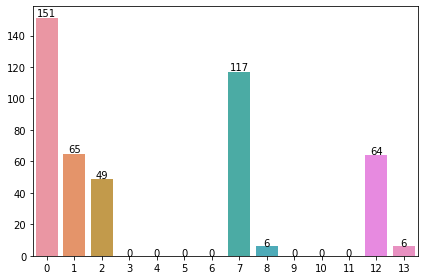

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


X = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
Y = np.array(result_cate)

ax = sns.barplot(X,Y, order=X)
for p, q in zip(ax.patches, Y):
    ax.text(p.get_x()+p.get_width()/2.,
        p.get_height()*(1.01),
        "{}".format(q),
        ha = 'center'  )
    
plt.show()

# Class Balance (class = 10, 전동킥보드)

100%|███████████████████████████████████████████████████████████████████████████████| 184/184 [00:00<00:00, 893.57it/s]

[400, 233, 75, 33, 0, 23, 0, 263, 6, 170, 356, 0, 64, 6]



C:\Users\user\anaconda3\envs\yolor\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


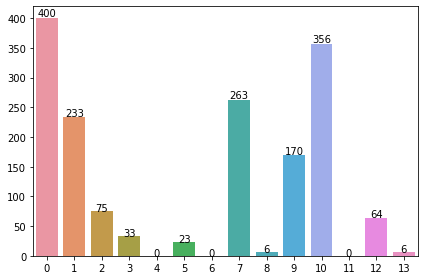

In [68]:
# 클래스 균형 확인 코드
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cate = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
train002_label_list = glob("../dataset/train-002/labels/*.txt")

for train_labels in tqdm(train002_label_list): # 1 txt file
    with open(train_labels, 'r', encoding='utf-8') as f:
        label = f.readlines() # 1 txt file labels
        for lab in label: # 1 line, in 1 txt file
            lab = lab.split(' ')
            cls = int(lab[0])
            
            if cls == 0:
                cate[0] += 1
            elif cls == 1:
                cate[1] += 1
            elif cls == 2:
                cate[2] += 1
            elif cls == 3:
                cate[3] += 1
            elif cls == 4:
                cate[4] += 1
            elif cls == 5:
                cate[5] += 1
            elif cls == 6:
                cate[6] += 1
            elif cls == 7:
                cate[7] += 1
            elif cls == 8:
                cate[8] += 1
            elif cls == 9:
                cate[9] += 1
            elif cls == 10:
                cate[10] += 1
            elif cls == 11:
                cate[11] += 1
            elif cls == 12:
                cate[12] += 1
            elif cls == 13:
                cate[13] += 1 
                
result_cate = cate
print(result_cate)

X = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
Y = np.array(result_cate)

ax = sns.barplot(X,Y, order=X)
for p, q in zip(ax.patches, Y):
    ax.text(p.get_x()+p.get_width()/2.,
        p.get_height()*(1.01),
        "{}".format(q),
        ha = 'center'  )
    
plt.show()

# Class Balance (class = 8, 어린이)

100%|███████████████████████████████████████████████████████████████████████████████| 632/632 [00:00<00:00, 956.68it/s]
C:\Users\user\anaconda3\envs\yolor\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[1594, 865, 161, 36, 2, 75, 7, 1051, 496, 185, 356, 0, 64, 196]


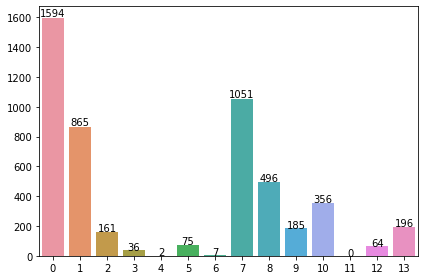

In [72]:
# 클래스 균형 확인 코드
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cate = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
train002_label_list = glob("../dataset/train-002/labels/*.txt")

for train_labels in tqdm(train002_label_list): # 1 txt file
    with open(train_labels, 'r', encoding='utf-8') as f:
        label = f.readlines() # 1 txt file labels
        for lab in label: # 1 line, in 1 txt file
            lab = lab.split(' ')
            cls = int(lab[0])
            
            if cls == 0:
                cate[0] += 1
            elif cls == 1:
                cate[1] += 1
            elif cls == 2:
                cate[2] += 1
            elif cls == 3:
                cate[3] += 1
            elif cls == 4:
                cate[4] += 1
            elif cls == 5:
                cate[5] += 1
            elif cls == 6:
                cate[6] += 1
            elif cls == 7:
                cate[7] += 1
            elif cls == 8:
                cate[8] += 1
            elif cls == 9:
                cate[9] += 1
            elif cls == 10:
                cate[10] += 1
            elif cls == 11:
                cate[11] += 1
            elif cls == 12:
                cate[12] += 1
            elif cls == 13:
                cate[13] += 1 
                
result_cate = cate
print(result_cate)

X = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
Y = np.array(result_cate)

ax = sns.barplot(X,Y, order=X)
for p, q in zip(ax.patches, Y):
    ax.text(p.get_x()+p.get_width()/2.,
        p.get_height()*(1.01),
        "{}".format(q),
        ha = 'center'  )
    
plt.show()

# Class Balance (class = 3, 버스)

100%|████████████████████████████████████████████████████████████████████████████| 1020/1020 [00:00<00:00, 1658.25it/s]

[2831, 1543, 211, 902, 8, 100, 15, 1456, 496, 228, 356, 11, 64, 197]



C:\Users\user\anaconda3\envs\yolor\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


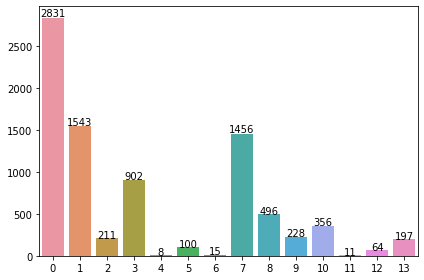

In [75]:
# 클래스 균형 확인 코드
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cate = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
train002_label_list = glob("../dataset/train-002/labels/*.txt")

for train_labels in tqdm(train002_label_list): # 1 txt file
    with open(train_labels, 'r', encoding='utf-8') as f:
        label = f.readlines() # 1 txt file labels
        for lab in label: # 1 line, in 1 txt file
            lab = lab.split(' ')
            cls = int(lab[0])
            
            if cls == 0:
                cate[0] += 1
            elif cls == 1:
                cate[1] += 1
            elif cls == 2:
                cate[2] += 1
            elif cls == 3:
                cate[3] += 1
            elif cls == 4:
                cate[4] += 1
            elif cls == 5:
                cate[5] += 1
            elif cls == 6:
                cate[6] += 1
            elif cls == 7:
                cate[7] += 1
            elif cls == 8:
                cate[8] += 1
            elif cls == 9:
                cate[9] += 1
            elif cls == 10:
                cate[10] += 1
            elif cls == 11:
                cate[11] += 1
            elif cls == 12:
                cate[12] += 1
            elif cls == 13:
                cate[13] += 1 
                
result_cate = cate
print(result_cate)

X = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
Y = np.array(result_cate)

ax = sns.barplot(X,Y, order=X)
for p, q in zip(ax.patches, Y):
    ax.text(p.get_x()+p.get_width()/2.,
        p.get_height()*(1.01),
        "{}".format(q),
        ha = 'center'  )
    
plt.show()

# Class Balance (class = 4, 학원차량(통학버스))

100%|████████████████████████████████████████████████████████████████████████████| 2117/2117 [00:01<00:00, 1300.42it/s]

[5705, 2633, 367, 902, 1140, 275, 36, 1589, 496, 238, 356, 11, 64, 219]



C:\Users\user\anaconda3\envs\yolor\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


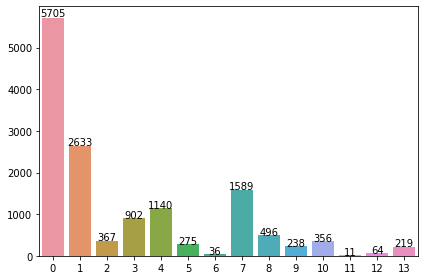

In [78]:
# 클래스 균형 확인 코드
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cate = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
train002_label_list = glob("../dataset/train-002/labels/*.txt")

for train_labels in tqdm(train002_label_list): # 1 txt file
    with open(train_labels, 'r', encoding='utf-8') as f:
        label = f.readlines() # 1 txt file labels
        for lab in label: # 1 line, in 1 txt file
            lab = lab.split(' ')
            cls = int(lab[0])
            
            if cls == 0:
                cate[0] += 1
            elif cls == 1:
                cate[1] += 1
            elif cls == 2:
                cate[2] += 1
            elif cls == 3:
                cate[3] += 1
            elif cls == 4:
                cate[4] += 1
            elif cls == 5:
                cate[5] += 1
            elif cls == 6:
                cate[6] += 1
            elif cls == 7:
                cate[7] += 1
            elif cls == 8:
                cate[8] += 1
            elif cls == 9:
                cate[9] += 1
            elif cls == 10:
                cate[10] += 1
            elif cls == 11:
                cate[11] += 1
            elif cls == 12:
                cate[12] += 1
            elif cls == 13:
                cate[13] += 1 
                
result_cate = cate
print(result_cate)

X = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
Y = np.array(result_cate)

ax = sns.barplot(X,Y, order=X)
for p, q in zip(ax.patches, Y):
    ax.text(p.get_x()+p.get_width()/2.,
        p.get_height()*(1.01),
        "{}".format(q),
        ha = 'center'  )
    
plt.show()

# Class Balance (class = 6, 택시)

100%|████████████████████████████████████████████████████████████████████████████| 3515/3515 [00:02<00:00, 1681.60it/s]
C:\Users\user\anaconda3\envs\yolor\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[8852, 4005, 689, 902, 1140, 604, 1564, 1768, 496, 246, 356, 48, 64, 226]


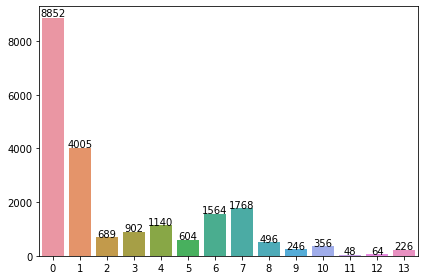

In [86]:
# 클래스 균형 확인 코드
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cate = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
train002_label_list = glob("../dataset/train-002/labels/*.txt")

for train_labels in tqdm(train002_label_list): # 1 txt file
    with open(train_labels, 'r', encoding='utf-8') as f:
        label = f.readlines() # 1 txt file labels
        for lab in label: # 1 line, in 1 txt file
            lab = lab.split(' ')
            cls = int(lab[0])
            
            if cls == 0:
                cate[0] += 1
            elif cls == 1:
                cate[1] += 1
            elif cls == 2:
                cate[2] += 1
            elif cls == 3:
                cate[3] += 1
            elif cls == 4:
                cate[4] += 1
            elif cls == 5:
                cate[5] += 1
            elif cls == 6:
                cate[6] += 1
            elif cls == 7:
                cate[7] += 1
            elif cls == 8:
                cate[8] += 1
            elif cls == 9:
                cate[9] += 1
            elif cls == 10:
                cate[10] += 1
            elif cls == 11:
                cate[11] += 1
            elif cls == 12:
                cate[12] += 1
            elif cls == 13:
                cate[13] += 1 
                
result_cate = cate
print(result_cate)

X = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
Y = np.array(result_cate)

ax = sns.barplot(X,Y, order=X)
for p, q in zip(ax.patches, Y):
    ax.text(p.get_x()+p.get_width()/2.,
        p.get_height()*(1.01),
        "{}".format(q),
        ha = 'center'  )
    
plt.show()

# Class Balance (class = 9, 오토바이)

100%|████████████████████████████████████████████████████████████████████████████| 5590/5590 [00:03<00:00, 1586.46it/s]
C:\Users\user\anaconda3\envs\yolor\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[13631, 6125, 943, 902, 1140, 1021, 1564, 2135, 496, 2674, 356, 215, 64, 295]


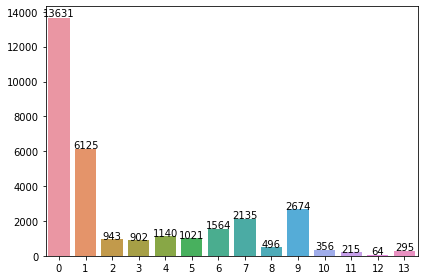

In [90]:
# 클래스 균형 확인 코드
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cate = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
train002_label_list = glob("../dataset/train-002/labels/*.txt")

for train_labels in tqdm(train002_label_list): # 1 txt file
    with open(train_labels, 'r', encoding='utf-8') as f:
        label = f.readlines() # 1 txt file labels
        for lab in label: # 1 line, in 1 txt file
            lab = lab.split(' ')
            cls = int(lab[0])
            
            if cls == 0:
                cate[0] += 1
            elif cls == 1:
                cate[1] += 1
            elif cls == 2:
                cate[2] += 1
            elif cls == 3:
                cate[3] += 1
            elif cls == 4:
                cate[4] += 1
            elif cls == 5:
                cate[5] += 1
            elif cls == 6:
                cate[6] += 1
            elif cls == 7:
                cate[7] += 1
            elif cls == 8:
                cate[8] += 1
            elif cls == 9:
                cate[9] += 1
            elif cls == 10:
                cate[10] += 1
            elif cls == 11:
                cate[11] += 1
            elif cls == 12:
                cate[12] += 1
            elif cls == 13:
                cate[13] += 1 
                
result_cate = cate
print(result_cate)

X = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
Y = np.array(result_cate)

ax = sns.barplot(X,Y, order=X)
for p, q in zip(ax.patches, Y):
    ax.text(p.get_x()+p.get_width()/2.,
        p.get_height()*(1.01),
        "{}".format(q),
        ha = 'center'  )
    
plt.show()

# Class Balance (class = 11, 자전거)

100%|████████████████████████████████████████████████████████████████████████████| 6911/6911 [00:02<00:00, 3019.74it/s]

[16437, 7335, 1256, 902, 1140, 1185, 1564, 2448, 496, 2674, 356, 2966, 64, 316]



C:\Users\user\anaconda3\envs\yolor\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


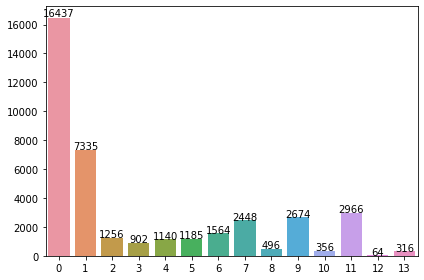

In [93]:
# 클래스 균형 확인 코드
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cate = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
train002_label_list = glob("../dataset/train-002/labels/*.txt")

for train_labels in tqdm(train002_label_list): # 1 txt file
    with open(train_labels, 'r', encoding='utf-8') as f:
        label = f.readlines() # 1 txt file labels
        for lab in label: # 1 line, in 1 txt file
            lab = lab.split(' ')
            cls = int(lab[0])
            
            if cls == 0:
                cate[0] += 1
            elif cls == 1:
                cate[1] += 1
            elif cls == 2:
                cate[2] += 1
            elif cls == 3:
                cate[3] += 1
            elif cls == 4:
                cate[4] += 1
            elif cls == 5:
                cate[5] += 1
            elif cls == 6:
                cate[6] += 1
            elif cls == 7:
                cate[7] += 1
            elif cls == 8:
                cate[8] += 1
            elif cls == 9:
                cate[9] += 1
            elif cls == 10:
                cate[10] += 1
            elif cls == 11:
                cate[11] += 1
            elif cls == 12:
                cate[12] += 1
            elif cls == 13:
                cate[13] += 1 
                
result_cate = cate
print(result_cate)

X = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
Y = np.array(result_cate)

ax = sns.barplot(X,Y, order=X)
for p, q in zip(ax.patches, Y):
    ax.text(p.get_x()+p.get_width()/2.,
        p.get_height()*(1.01),
        "{}".format(q),
        ha = 'center'  )
    
plt.show()

# Class Balance (class = 5, 트럭)

100%|█████████████████████████████████████████████████████████████████████████████| 9001/9001 [00:13<00:00, 668.62it/s]
C:\Users\user\anaconda3\envs\yolor\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[20869, 9601, 1678, 902, 1140, 3545, 1564, 4930, 496, 2674, 356, 2966, 64, 1056]


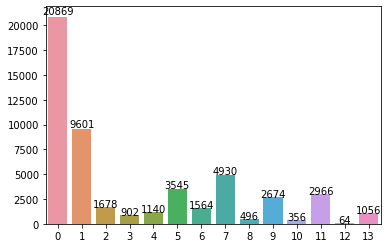

In [15]:
# 클래스 균형 확인 코드
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cate = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
train002_label_list = glob("../dataset/train-truck/labels/*.txt")

for train_labels in tqdm(train002_label_list): # 1 txt file
    with open(train_labels, 'r', encoding='utf-8') as f:
        label = f.readlines() # 1 txt file labels
        for lab in label: # 1 line, in 1 txt file
            lab = lab.split(' ')
            cls = int(lab[0])
            
            if cls == 0:
                cate[0] += 1
            elif cls == 1:
                cate[1] += 1
            elif cls == 2:
                cate[2] += 1
            elif cls == 3:
                cate[3] += 1
            elif cls == 4:
                cate[4] += 1
            elif cls == 5:
                cate[5] += 1
            elif cls == 6:
                cate[6] += 1
            elif cls == 7:
                cate[7] += 1
            elif cls == 8:
                cate[8] += 1
            elif cls == 9:
                cate[9] += 1
            elif cls == 10:
                cate[10] += 1
            elif cls == 11:
                cate[11] += 1
            elif cls == 12:
                cate[12] += 1
            elif cls == 13:
                cate[13] += 1 
                
result_cate = cate
print(result_cate)

X = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
Y = np.array(result_cate)

ax = sns.barplot(X,Y, order=X)
for p, q in zip(ax.patches, Y):
    ax.text(p.get_x()+p.get_width()/2.,
        p.get_height()*(1.01),
        "{}".format(q),
        ha = 'center'  )
    
plt.show()

# Class Balance (class = 2, 승합차)

100%|███████████████████████████████████████████████████████████████████████████| 11531/11531 [00:20<00:00, 561.43it/s]

[28214, 12834, 4581, 902, 1140, 3545, 1564, 7492, 496, 2674, 356, 2966, 64, 2212]



C:\Users\user\anaconda3\envs\yolor\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


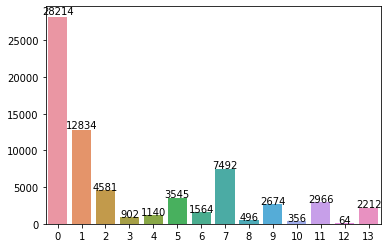

In [25]:
# 클래스 균형 확인 코드
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cate = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
train002_label_list = glob("../dataset/train-van/labels/*.txt")

for train_labels in tqdm(train002_label_list): # 1 txt file
    with open(train_labels, 'r', encoding='utf-8') as f:
        label = f.readlines() # 1 txt file labels
        for lab in label: # 1 line, in 1 txt file
            lab = lab.split(' ')
            cls = int(lab[0])
            
            if cls == 0:
                cate[0] += 1
            elif cls == 1:
                cate[1] += 1
            elif cls == 2:
                cate[2] += 1
            elif cls == 3:
                cate[3] += 1
            elif cls == 4:
                cate[4] += 1
            elif cls == 5:
                cate[5] += 1
            elif cls == 6:
                cate[6] += 1
            elif cls == 7:
                cate[7] += 1
            elif cls == 8:
                cate[8] += 1
            elif cls == 9:
                cate[9] += 1
            elif cls == 10:
                cate[10] += 1
            elif cls == 11:
                cate[11] += 1
            elif cls == 12:
                cate[12] += 1
            elif cls == 13:
                cate[13] += 1 
                
result_cate = cate
print(result_cate)

X = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
Y = np.array(result_cate)

ax = sns.barplot(X,Y, order=X)
for p, q in zip(ax.patches, Y):
    ax.text(p.get_x()+p.get_width()/2.,
        p.get_height()*(1.01),
        "{}".format(q),
        ha = 'center'  )
    
plt.show()

# Class Balance (class = 13, 쇼핑카트)

100%|███████████████████████████████████████████████████████████████████████████| 17392/17392 [00:31<00:00, 553.46it/s]
C:\Users\user\anaconda3\envs\yolor\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[39330, 18170, 4581, 902, 1140, 3545, 1564, 9804, 496, 2674, 356, 2966, 64, 8997]


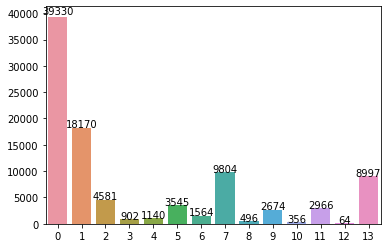

In [7]:
# 클래스 균형 확인 코드
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cate = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
train002_label_list = glob("../dataset/train-cart/labels/*.txt")

for train_labels in tqdm(train002_label_list): # 1 txt file
    with open(train_labels, 'r', encoding='utf-8') as f:
        label = f.readlines() # 1 txt file labels
        for lab in label: # 1 line, in 1 txt file
            lab = lab.split(' ')
            cls = int(lab[0])
            
            if cls == 0:
                cate[0] += 1
            elif cls == 1:
                cate[1] += 1
            elif cls == 2:
                cate[2] += 1
            elif cls == 3:
                cate[3] += 1
            elif cls == 4:
                cate[4] += 1
            elif cls == 5:
                cate[5] += 1
            elif cls == 6:
                cate[6] += 1
            elif cls == 7:
                cate[7] += 1
            elif cls == 8:
                cate[8] += 1
            elif cls == 9:
                cate[9] += 1
            elif cls == 10:
                cate[10] += 1
            elif cls == 11:
                cate[11] += 1
            elif cls == 12:
                cate[12] += 1
            elif cls == 13:
                cate[13] += 1 
                
result_cate = cate
print(result_cate)

X = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
Y = np.array(result_cate)

ax = sns.barplot(X,Y, order=X)
for p, q in zip(ax.patches, Y):
    ax.text(p.get_x()+p.get_width()/2.,
        p.get_height()*(1.01),
        "{}".format(q),
        ha = 'center'  )
    
plt.show()

# Class Balance (class = 7, 성인)

100%|███████████████████████████████████████████████████████████████████████████| 24624/24624 [00:47<00:00, 519.35it/s]

[58469, 28152, 4581, 902, 1140, 3545, 1564, 20747, 496, 2674, 356, 2966, 64, 8997]



C:\Users\user\anaconda3\envs\yolor\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


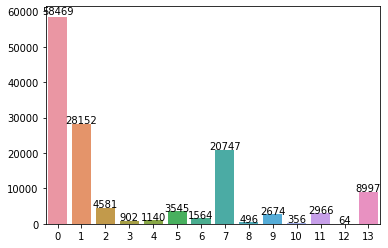

In [13]:
# 클래스 균형 확인 코드
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cate = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
train002_label_list = glob("../dataset/train-adult/labels/*.txt")

for train_labels in tqdm(train002_label_list): # 1 txt file
    with open(train_labels, 'r', encoding='utf-8') as f:
        label = f.readlines() # 1 txt file labels
        for lab in label: # 1 line, in 1 txt file
            lab = lab.split(' ')
            cls = int(lab[0])
            
            if cls == 0:
                cate[0] += 1
            elif cls == 1:
                cate[1] += 1
            elif cls == 2:
                cate[2] += 1
            elif cls == 3:
                cate[3] += 1
            elif cls == 4:
                cate[4] += 1
            elif cls == 5:
                cate[5] += 1
            elif cls == 6:
                cate[6] += 1
            elif cls == 7:
                cate[7] += 1
            elif cls == 8:
                cate[8] += 1
            elif cls == 9:
                cate[9] += 1
            elif cls == 10:
                cate[10] += 1
            elif cls == 11:
                cate[11] += 1
            elif cls == 12:
                cate[12] += 1
            elif cls == 13:
                cate[13] += 1 
                
result_cate = cate
print(result_cate)

X = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
Y = np.array(result_cate)

ax = sns.barplot(X,Y, order=X)
for p, q in zip(ax.patches, Y):
    ax.text(p.get_x()+p.get_width()/2.,
        p.get_height()*(1.01),
        "{}".format(q),
        ha = 'center'  )
    
plt.show()

# Class Balance (class = 1, SUV)

100%|███████████████████████████████████████████████████████████████████████████| 24637/24637 [00:43<00:00, 563.65it/s]

[58524, 28173, 4581, 902, 1140, 3545, 1564, 20747, 496, 2674, 356, 2966, 64, 8997]



C:\Users\user\anaconda3\envs\yolor\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


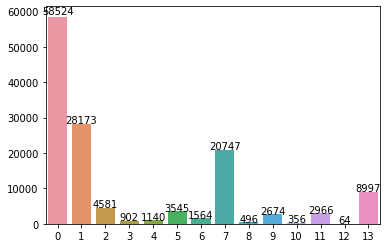

In [19]:
# 클래스 균형 확인 코드
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cate = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
train002_label_list = glob("../dataset/train-suv/labels/*.txt")

for train_labels in tqdm(train002_label_list): # 1 txt file
    with open(train_labels, 'r', encoding='utf-8') as f:
        label = f.readlines() # 1 txt file labels
        for lab in label: # 1 line, in 1 txt file
            lab = lab.split(' ')
            cls = int(lab[0])
            
            if cls == 0:
                cate[0] += 1
            elif cls == 1:
                cate[1] += 1
            elif cls == 2:
                cate[2] += 1
            elif cls == 3:
                cate[3] += 1
            elif cls == 4:
                cate[4] += 1
            elif cls == 5:
                cate[5] += 1
            elif cls == 6:
                cate[6] += 1
            elif cls == 7:
                cate[7] += 1
            elif cls == 8:
                cate[8] += 1
            elif cls == 9:
                cate[9] += 1
            elif cls == 10:
                cate[10] += 1
            elif cls == 11:
                cate[11] += 1
            elif cls == 12:
                cate[12] += 1
            elif cls == 13:
                cate[13] += 1 
                
result_cate = cate
print(result_cate)

X = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
Y = np.array(result_cate)

ax = sns.barplot(X,Y, order=X)
for p, q in zip(ax.patches, Y):
    ax.text(p.get_x()+p.get_width()/2.,
        p.get_height()*(1.01),
        "{}".format(q),
        ha = 'center'  )
    
plt.show()